# <center>LEAD SCORING CASE STUDY</center>
<center>By: Dam Xuan Long (longdamxuan06@gmail.com)

## 1. Data Overview

In [1]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
null_counts = df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
print(sorted_null_counts)


Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [5]:
null_pct = df.isnull().sum() / df.shape[0] * 100
print(null_pct.sort_values(ascending=False))

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Certain columns exhibit elevated null value rates, including but not limited to Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, and Tags

In [6]:
# Prospect ID and Lead Number are deemed irrelevant to the analysis and can be excluded. 
# Additionally, columns with a substantial percentage of null values (>30%) can be dropped at the initial stages of the analysis.
cols_to_drop = ['Prospect ID', 'Lead Number', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', \
                'Asymmetrique Activity Score', 'Asymmetrique Profile Score', \
                'Tags', 'Lead Quality']
df = df.drop(cols_to_drop, axis=1)

In [7]:
# Checking dataframe
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.0,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.0,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.0,55.0


Observations include the following:

* The dataset comprises 9,240 rows and 37 columns. Following the early exclusion of Prospect ID, Lead Number, and 7 columns with significant null values, 28 columns remain.
* The "Converted" column serves as the target variable.
* Numeric columns encompass TotalVisits, Total Time Spent on Website, and Page Views Per Visit. Notably, the "Converted" column, despite having values of 0 and 1, is categorically oriented.
* The remaining 24 columns are categorical in nature.

## 2. Data cleaning and EDA

### Handling the numeric colums

Addressing the numeric columns involves considering TotalVisits, Total Time Spent on Website, and Page Views Per Visit. The null value percentages in these columns are 1.48%, 0, and 1.48%, respectively. Given that these columns have a float data type and the null percentages are minimal, we can confidently substitute the null values with their respective median values. However, it's essential to handle outliers before implementing this replacement. Next, we will examine whether there are outliers present in the numeric columns.

Now, let's see if there are outliers in the numeric columns

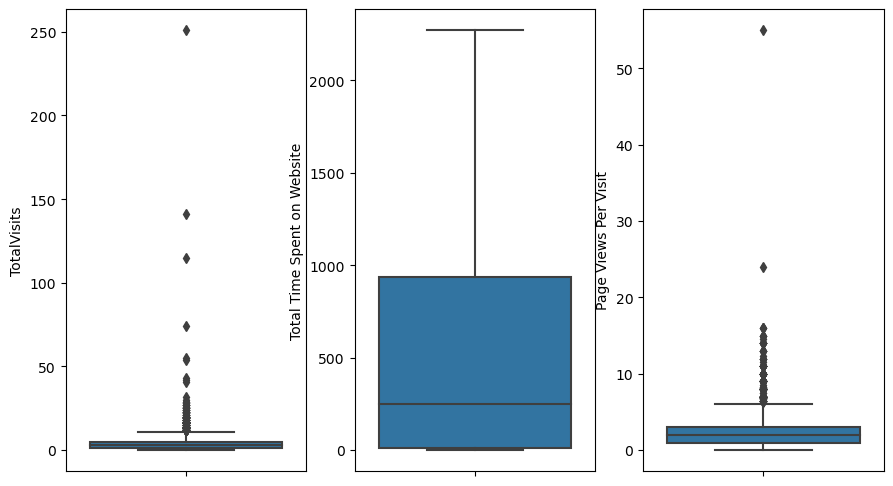

In [9]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (18, 6))
i = 1
for col in num_cols:
    plt.subplot(1, 5, i)
    sns.boxplot(y = col, data = df)
    i+=1

A conspicuous presence of outliers is apparent, particularly in TotalVisits and PageViews Per Visit. Let's address these outliers individually

In [10]:
# Handling TotalVisits

# Checking 99 percentile value
TotalVisits_99 = df['TotalVisits'].quantile(.99)
print(TotalVisits_99)

17.0


In [11]:
# Let's see how many % of data points are above the 99 percentile values
TotalVisits_99pct = df[df['TotalVisits'] > TotalVisits_99]['TotalVisits'].count() / df.shape[0]
TotalVisits_99pct * 100

0.8982683982683983

In [12]:
# Less than 1% of the data points are outliers. We can cap them at 99 percentile values
# Capping TotalVisits at 99 percentile value
TotalVisit_99_index = df[df['TotalVisits']>TotalVisits_99].index.to_list()
df.loc[TotalVisit_99_index, 'TotalVisits'] = TotalVisits_99

<Axes: >

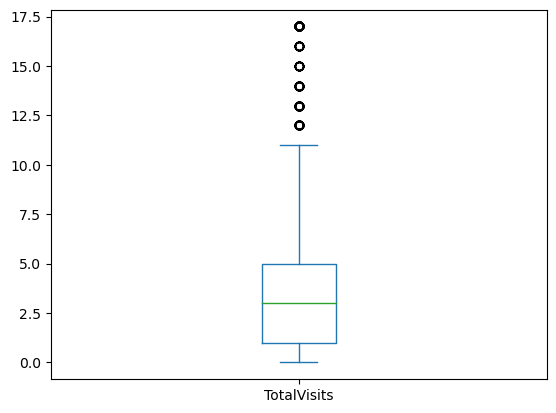

In [13]:
# Plotting TotalVisits again to verify
df['TotalVisits'].plot.box()

In [14]:
# Handling Page View Per Visit

# Checking 99 percentile value
PageViewPerVisits_99 = df['Page Views Per Visit'].quantile(.99)
print(PageViewPerVisits_99)

9.0


In [15]:
# Let's see how many % of data points are above the 99 percentile values
PageViewPerVisits_99pct = df[df['Page Views Per Visit'] > PageViewPerVisits_99]['Page Views Per Visit'].count() / df.shape[0]
PageViewPerVisits_99pct * 100

0.8116883116883116

In [16]:
# We can see that only 0.81% of data points are above the 99 percentile values. We can cap them there
# Capping TotalVisits at 99 percentile value
PageViewPerVisit_99_index = df[df['Page Views Per Visit']>PageViewPerVisits_99].index.to_list()
df.loc[PageViewPerVisit_99_index, 'Page Views Per Visit'] = PageViewPerVisits_99

<Axes: >

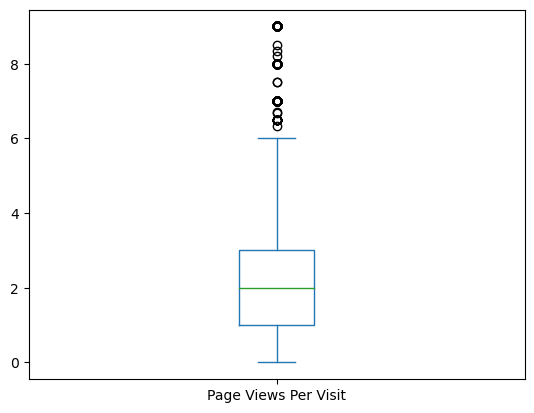

In [17]:
df['Page Views Per Visit'].plot.box()

It looks much better. Now let's handle null values in these columns. 

In [18]:
for col in num_cols:
    median_value = df[col].median()
    null_index = df[df[col].isnull()].index.to_list()
    df.loc[null_index, col] = median_value

In [19]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalVisits                  9240 non-null   float64
 1   Total Time Spent on Website  9240 non-null   int64  
 2   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 216.7 KB


In [20]:
df[num_cols].corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.324556,0.706203
Total Time Spent on Website,0.324556,1.000000,0.336715
Page Views Per Visit,0.706203,0.336715,1.000000


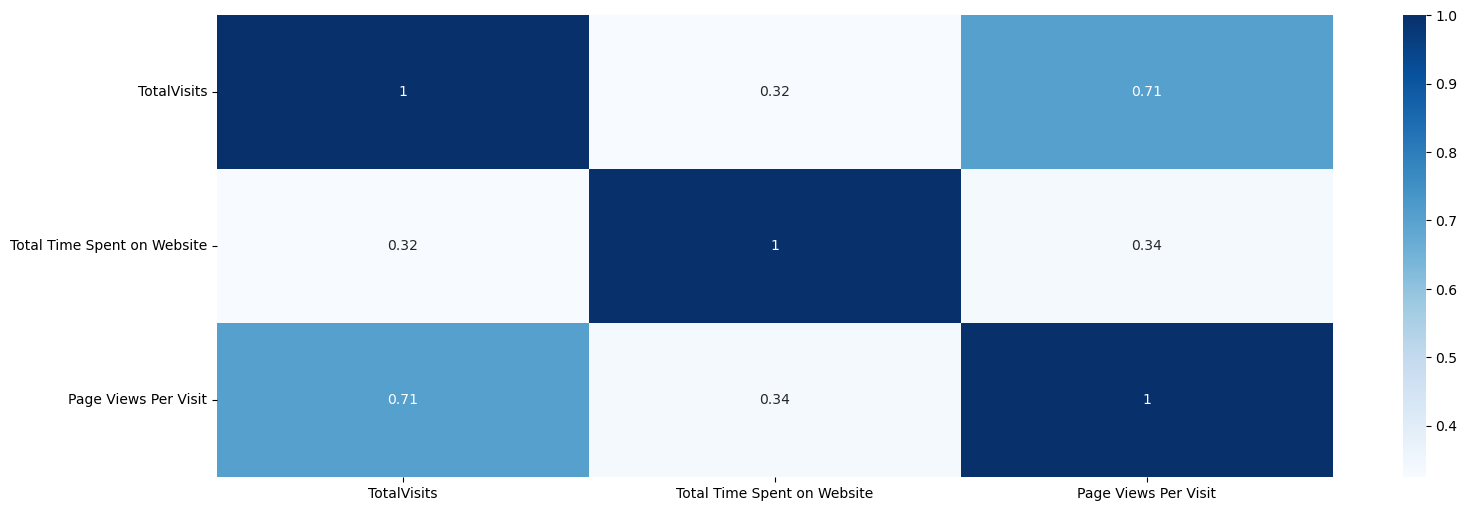

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.show()

Observing a substantial correlation coefficient of 0.71 between Page Views Per Visit and TotalVisits, it may be prudent to consider removing one of these variables in subsequent stages of analysis.

### Handling categorical columns

In [22]:
cat_cols = list(set(df.columns) - set(num_cols))
print(sorted(cat_cols))

['A free copy of Mastering The Interview', 'City', 'Converted', 'Country', 'Digital Advertisement', 'Do Not Call', 'Do Not Email', 'Get updates on DM Content', 'How did you hear about X Education', 'I agree to pay the amount through cheque', 'Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Profile', 'Lead Source', 'Magazine', 'Newspaper', 'Newspaper Article', 'Receive More Updates About Our Courses', 'Search', 'Specialization', 'Through Recommendations', 'Update me on Supply Chain Content', 'What is your current occupation', 'What matters most to you in choosing a course', 'X Education Forums']


In [23]:
# Initially, let's replace the null values in categorical columns with the placeholder 'Not Provided'
cols = ['City', 'Country', 'How did you hear about X Education', 'Last Activity', 'Lead Profile', \
        'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course']
df[cols] = df[cols].fillna('Not Provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 


#### Converted

In [24]:
# Saving total number of rows in nrows variable
nrows = df.shape[0]

In [25]:
converted = df['Converted'].value_counts()

([<matplotlib.patches.Wedge at 0x7fdb889af730>,
 [Text(-1.0294635994500816, -0.3875625077420184, '0'),
  Text(1.0294636357362978, 0.3875624113566783, '1')],
 [Text(-0.5615255997000445, -0.21139773149564636, '61.5%'),
  Text(0.5615256194925261, 0.2113976789218245, '38.5%')])

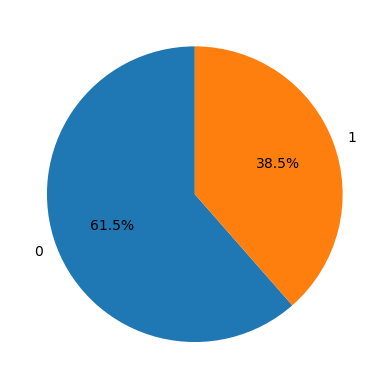

In [26]:
plt.pie(converted.values, labels = [0, 1], autopct='%1.1f%%', startangle=90)

The dataset exhibits an imbalance, with 61.5% having values of 0 (not converted) and only 38.5% with a value of 1 (converted).

#### A free copy of Mastering The Interview

=> This column does not contain null values, allowing us to proceed directly.

In [27]:
col = 'A free copy of Mastering The Interview'
df[col].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [28]:
# We tally the occurrences of Lead Origin, considering it lacks any null values.

pvt_free_copy = pd.pivot_table(df, index=['Converted'], columns=col, values='Lead Origin', aggfunc = 'count')
pvt_free_copy

A free copy of Mastering The Interview,No,Yes
Converted,,
0,3821,1858
1,2531,1030


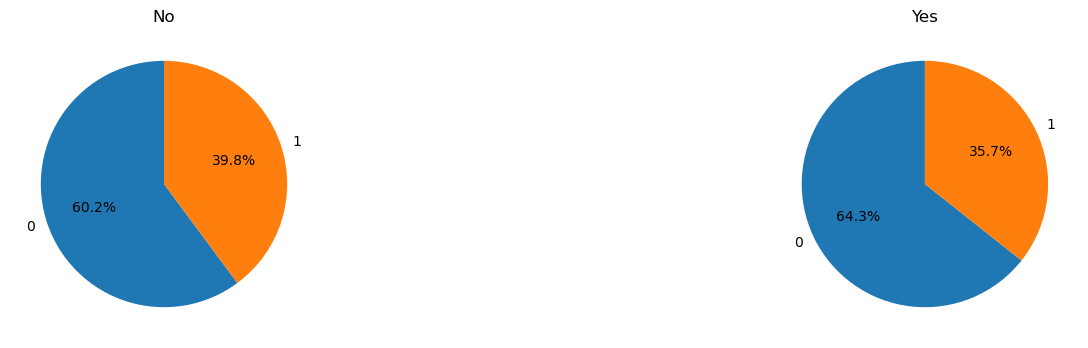

In [29]:
plt.figure(figsize=(18, 4))
for i in enumerate(pvt_free_copy.columns):
    ax = plt.subplot(1, 2, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_free_copy.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

Individuals who did not receive a complimentary copy of "Mastering The Interview" exhibit a slightly higher conversion rate of 39.8%, compared to 35.7% for those who received the free copy.

#### City

In [30]:
col = 'City'
df[col].value_counts()

Mumbai                         3222
Select                         2249
Not Provided                   1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
# Let's merge Select with Not Provided
city_select_index = df[df[col] == 'Select'].index.to_list()
df.loc[city_select_index, col] = 'Not Provided'
df[col].value_counts()

Not Provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
pvt_city = pd.pivot_table(df, index=['Converted'], columns=col, values='Lead Origin', aggfunc = 'count')
pvt_city

City,Mumbai,Not Provided,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
Converted,,,,,,,
0,1913,2412,410,256,225,414,49
1,1309,1257,276,201,155,338,25


<Axes: xlabel='Converted'>

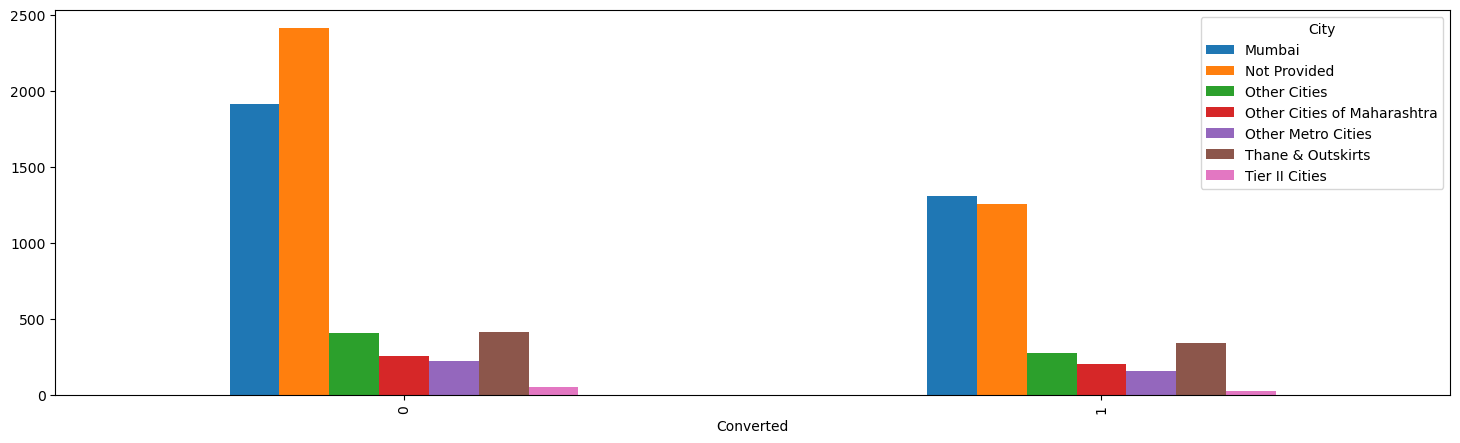

In [33]:
pvt_city.plot.bar(figsize=(18, 5))

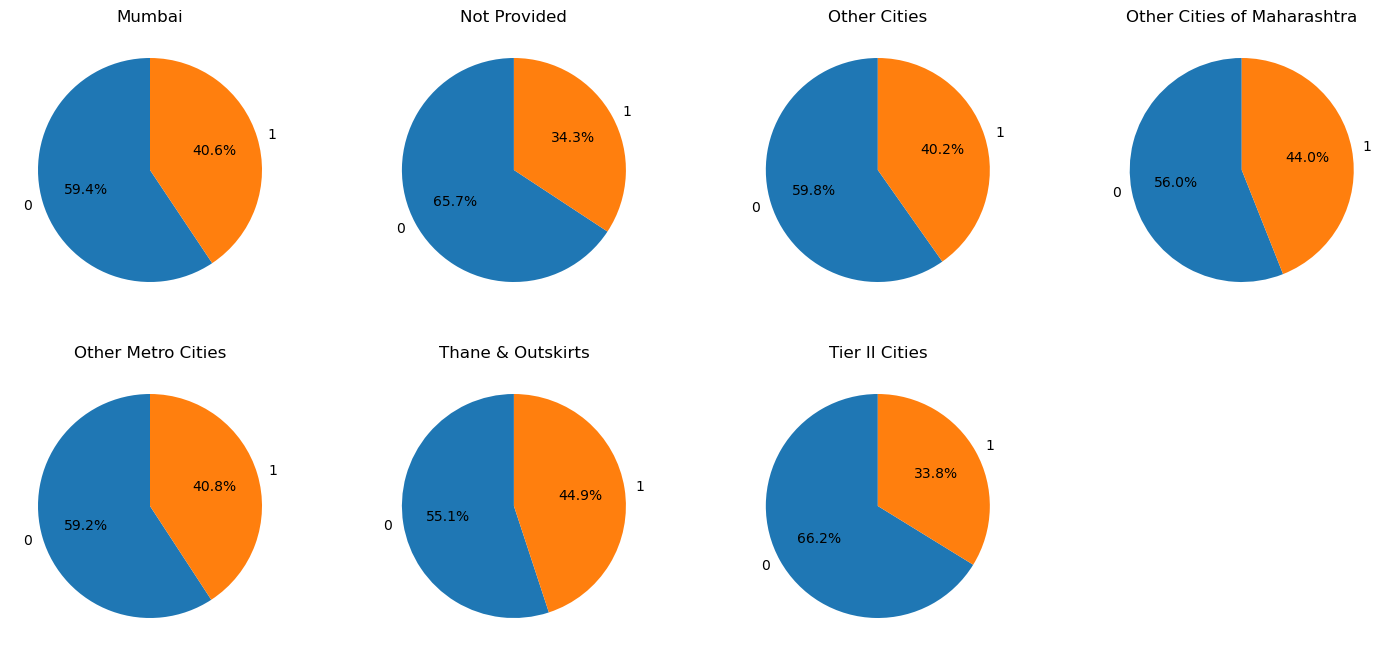

In [34]:
plt.figure(figsize=(18, 8))
for i in enumerate(pvt_city.columns):
    ax = plt.subplot(2, 4, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_city.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

We can see that majority of leads who disclosed their cities are from Mumbai, which has 40.6 conversion rates.

#### Country

In [35]:
col = 'Country'
df[col].value_counts()

India                   6492
Not Provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

The majority of leads originate from India, while data from many other countries is insufficient for meaningful analysis. To address this, let's group all countries that are neither 'India' nor 'Not Provided' into a single category named 'International'.

In [36]:
outside_india_index = df[~df[col].isin(['India', 'Not Provided'])].index.to_list()
df.loc[outside_india_index, col] = 'International'
df[col].value_counts()

India            6492
Not Provided     2461
International     287
Name: Country, dtype: int64

In [37]:
pvt_country = pd.pivot_table(df, index=['Converted'], columns=col, values='Lead Origin', aggfunc = 'count')
pvt_country

Country,India,International,Not Provided
Converted,,,
0,4091,203,1385
1,2401,84,1076


<Axes: xlabel='Converted'>

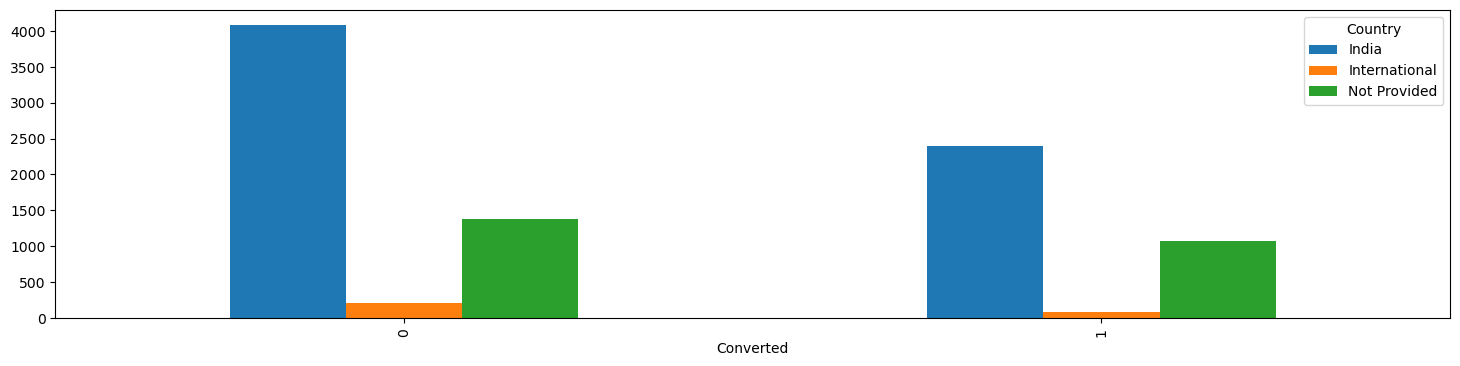

In [38]:
pvt_country.plot.bar(figsize = (18, 4))

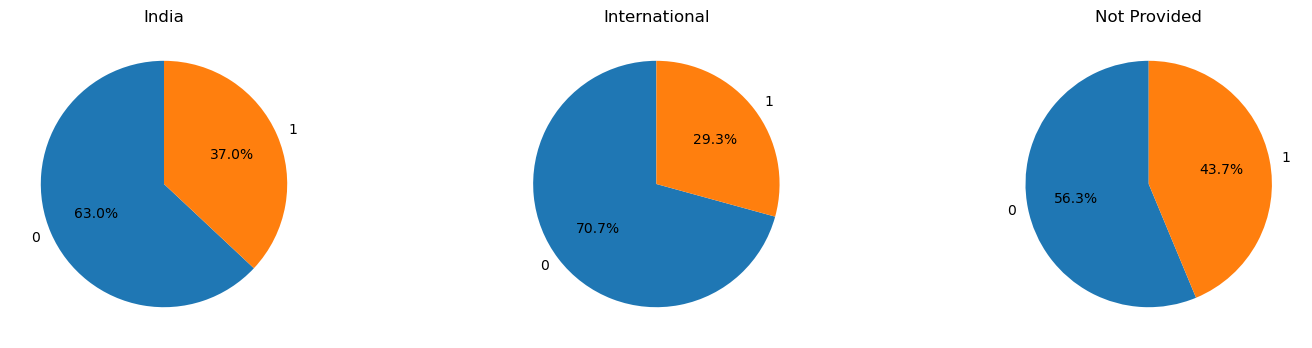

In [39]:
plt.figure(figsize=(18, 4))
for i in enumerate(pvt_country.columns):
    ax = plt.subplot(1, 3, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_country.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

Leads originating from India showcase a conversion rate of 37.0%, while international leads display a slightly lower conversion rate of 29.3%.

### Preferences for Updates:
1. Get updates on DM Content
2. Update me on Supply Chain Content
3. Through Recommendations
4. Receive more updates about our courses
5. I agree to pay the amount through cheque
6. Digital Advertisement
7. Magazine
8. Newspaper
9. Newspaper Article
10. Search
11. X Education Forums
12. Do Not Call

In [40]:
cols = ['Get updates on DM Content', 'Update me on Supply Chain Content', 'Through Recommendations', 
        'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 
        'Digital Advertisement', 'Magazine', 'Newspaper', 'Newspaper Article', 'Search', 
        'X Education Forums', 'Do Not Call']
for c in cols:
    print(df[c].value_counts())

No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64


Given that the majority of responses in these columns are "No," indicating limited utility for our classification task, we can proceed to drop them as well.

In [41]:
df = df.drop(cols, axis=1)

#### Do Not Email

In [42]:
pvt_do_not_email = pd.pivot_table(df, index=['Converted'], columns='Do Not Email', values='Lead Origin', aggfunc = 'count')
pvt_do_not_email

Do Not Email,No,Yes
Converted,,
0,5063,616
1,3443,118


<Axes: xlabel='Converted'>

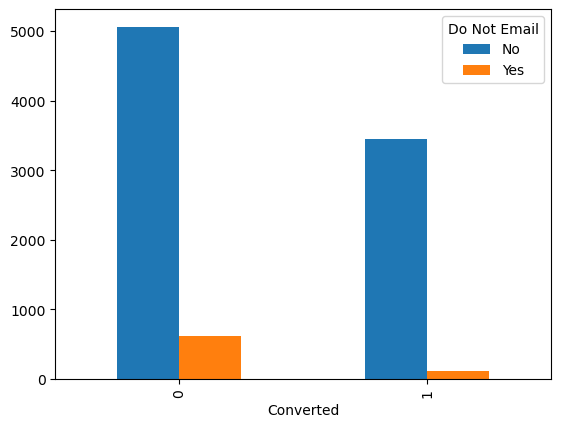

In [43]:
pvt_do_not_email.plot.bar()

Observations reveal the following:
* Among converted leads, a significant proportion opted for "No."

#### How did you hear about X Education

In [44]:
col = 'How did you hear about X Education'
df[col].value_counts()

Select                   5043
Not Provided             2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [45]:
# Let's merge Select with Not Provided
hear_select_index = df[df[col] == 'Select'].index.to_list()
df.loc[hear_select_index, col] = 'Not Provided'
df[col].value_counts()

Not Provided             7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [46]:
df[col].value_counts() * 100 / nrows

Not Provided             78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

Considering that 78.5% of the data points in the column are essentially null values, it's advisable to drop this column before moving forward.

In [47]:
df = df.drop([col], axis = 1)

#### Last Activity, Last Notable Activity

While there are no null values in "Last Notable Activity," it's worth noting that there are 1.11% null values in the "Last Activity" column.

In [48]:
cols = ['Last Activity', 'Last Notable Activity']
for c in cols:
    print(df[c].value_counts())

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Provided                     103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unre

The most frequent activities include Email Opened, SMS Sent, Olark Chat Conversation, Page Visited on Website, Converted to Lead, Email Bounced, Email Link Clicked, Form Submitted on Website, Unreachable, Unsubscribed, and Had a Phone Conversation. Given the comparatively low frequency of the remaining activities, we can collectively replace them with 'Others.'

In [49]:
last_activity_freq = df['Last Activity'].value_counts()
least_common_activities = last_activity_freq[last_activity_freq < 30].keys().to_list()
least_common_activities

['Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [50]:
other_last_activity_index = df[df['Last Activity'].isin(least_common_activities)].index.to_list()
df.loc[other_last_activity_index, 'Last Activity'] = 'Others'
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Provided                  103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [51]:
pvt_last_activity = pd.pivot_table(df, index=['Converted'], columns='Last Activity', values='Lead Origin', aggfunc = 'count')

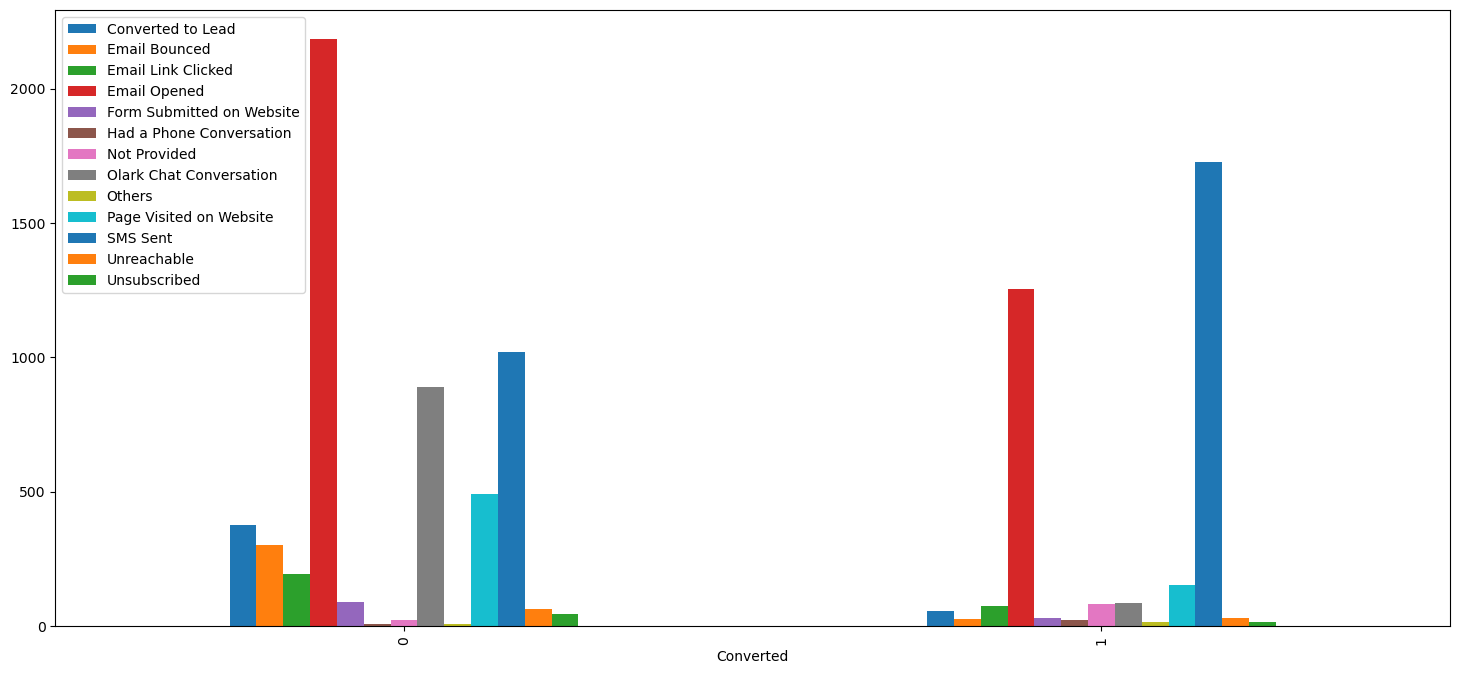

In [52]:
ax = pvt_last_activity.plot.bar(figsize=(18,8))
ax.legend(loc=2)

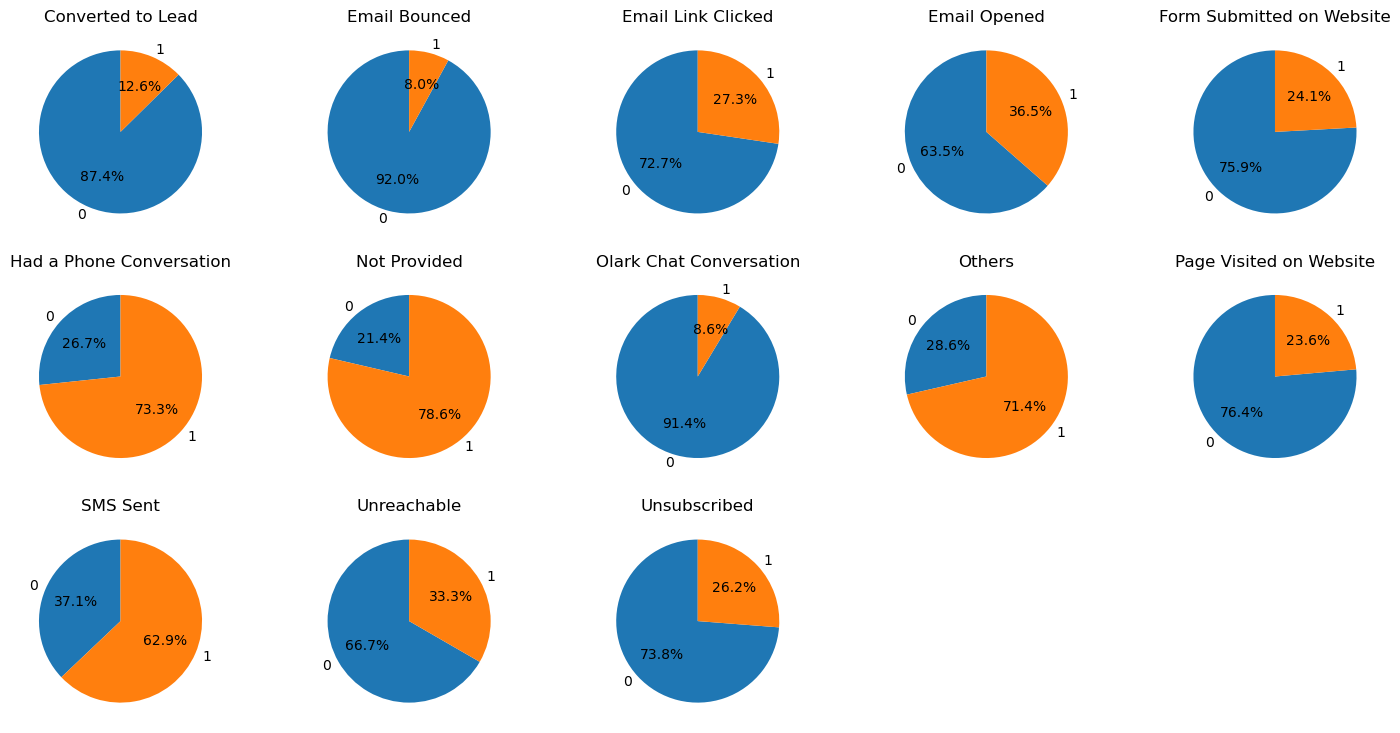

In [53]:
plt.figure(figsize=(18, 9))
for i in enumerate(pvt_last_activity.columns):
    ax = plt.subplot(3, 5, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_last_activity.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

Observations indicate that:

* Email Opened and SMS Sent are the two most common activities, boasting conversion ratios of 36.5% and 62.9%, respectively.

While Had a Phone Conversation exhibits the highest conversion rate, it is less frequently observed.
Moving on to Last Notable Activity, a similar approach can be employed as in Last Activity, replacing activities with counts less than 30 with 'Others'.

In [54]:
last_notable_activity_freq = df['Last Notable Activity'].value_counts()
least_common_notable_activities = last_notable_activity_freq[last_notable_activity_freq < 30].keys().to_list()
least_common_notable_activities

['Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [55]:
other_last_notable_activity_index = df[df['Last Notable Activity'].isin(least_common_notable_activities)].index.to_list()
df.loc[other_last_notable_activity_index, 'Last Notable Activity'] = 'Others'
df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

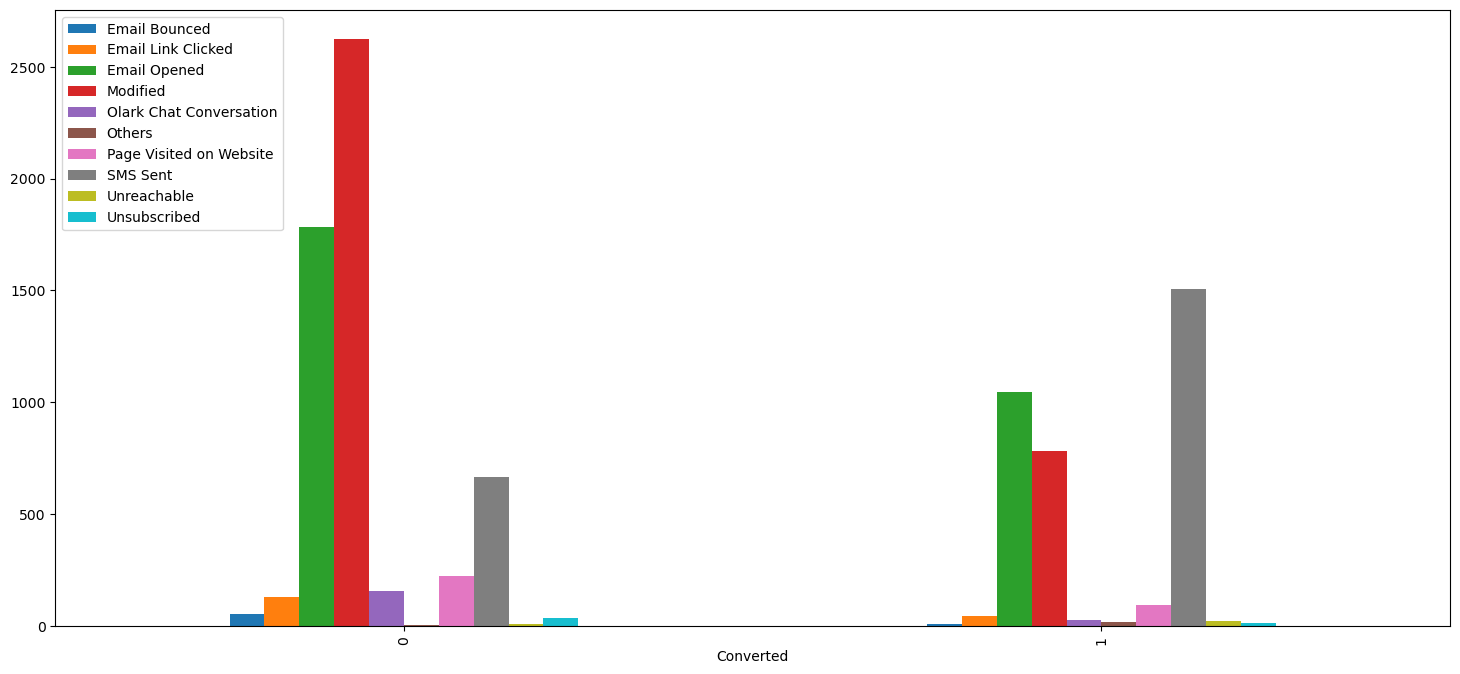

In [56]:
pvt_last_notable_activity = pd.pivot_table(df, index=['Converted'], columns='Last Notable Activity', values='Lead Origin', aggfunc = 'count')
ax = pvt_last_notable_activity.plot.bar(figsize=(18,8))
ax.legend(loc=2)

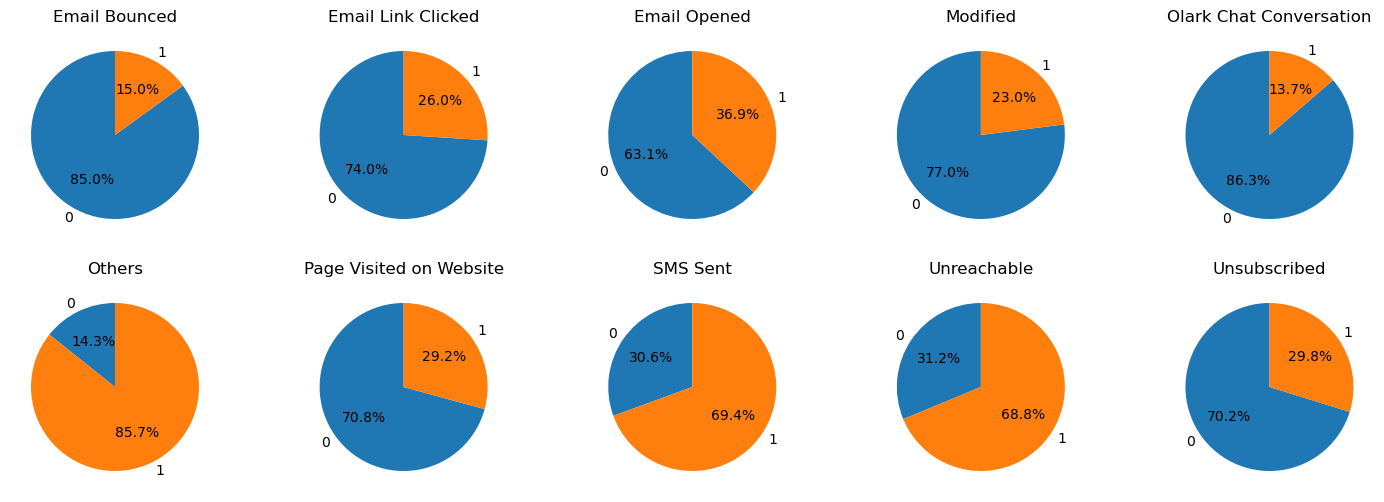

In [57]:
plt.figure(figsize=(18, 6))
for i in enumerate(pvt_last_notable_activity.columns):
    ax = plt.subplot(2, 5, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_last_notable_activity.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

We can notice a similar pattern as seen in Last Activity:
* Others seems to bring the highest conversion rate (85.7%,) followed by SMS sent (69.4%).
* Email bounced and Olark Chat Conversation seem to have the lowest conversion rate.

#### Lead Origin, Lead Source, Lead Profile

In [58]:
cols = ['Lead Origin', 'Lead Source', 'Lead Profile']
for col in cols:
    print(df[col].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Select                         4146
Not Provided                   2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specializ

In [59]:
# For Lead Origin, let's replace those with less than 30 data counts by 'Others', and display the value count again
col = 'Lead Source'
least_common_sources = ['bing', 'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', \
                        'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', \
                        'blog', 'NC_EDM']
least_common_source_index = df[df[col].isin(least_common_sources)].index.to_list()
df.loc[least_common_source_index, col] = 'Others'
df[col].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: Lead Source, dtype: int64

In [60]:
# For Lead Profile, let's replace 'Select' by 'Not Provided', and display the value count again
col = 'Lead Profile'
profile_select_index = df[df[col] == 'Select'].index.to_list()
df.loc[profile_select_index, col] = 'Not Provided'
df[col].value_counts()

Not Provided                   6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [61]:
df[col].value_counts() * 100 / nrows

Not Provided                   74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

We can see that Lead Profile has over 74% of one value 'Not Provided' which can be technically considered null values. This column, therefore, should be dropped.

In [62]:
df = df.drop([col], axis = 1)

In [63]:
# Change values to 'Do Not Email' which has no null values
pvt_origin = pd.pivot_table(df, index=['Converted'], columns='Lead Origin', values='Do Not Email', aggfunc = 'count')
pvt_origin

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,2465.0,3118.0,54.0,42.0,NaN
1,1115.0,1768.0,664.0,13.0,1.0


In [64]:
pvt_origin.loc[0, 'Quick Add Form'] = 0
pvt_origin

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,2465.0,3118.0,54.0,42.0,0.0
1,1115.0,1768.0,664.0,13.0,1.0


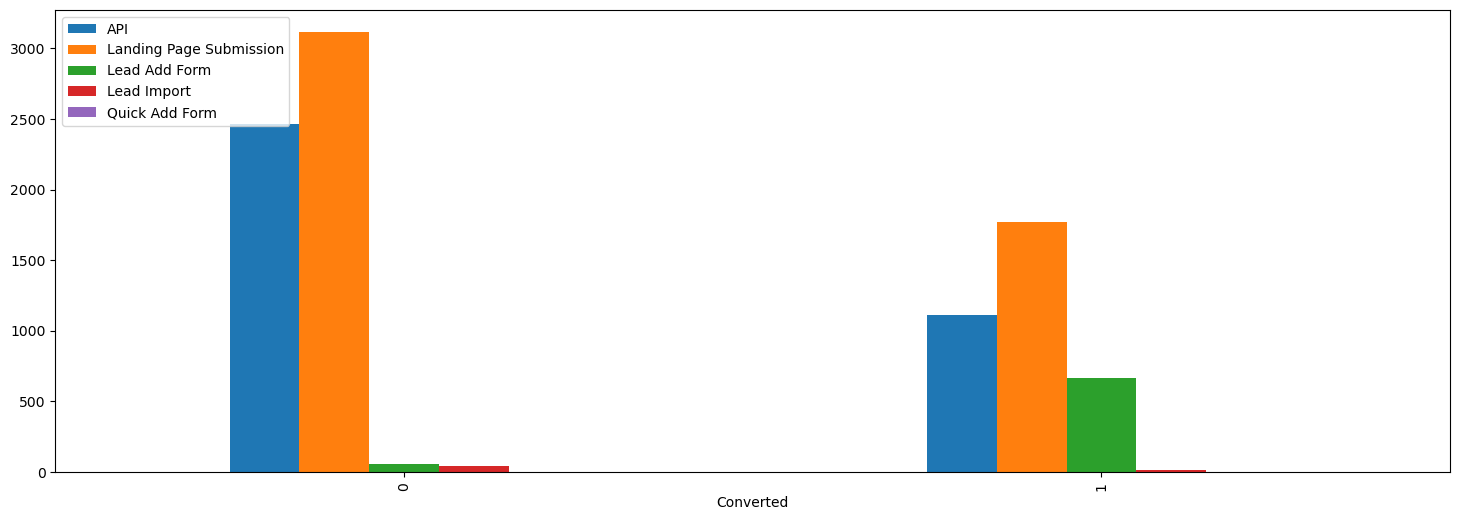

In [65]:
ax = pvt_origin.plot.bar(figsize=(18,6))
ax.legend(loc=2)

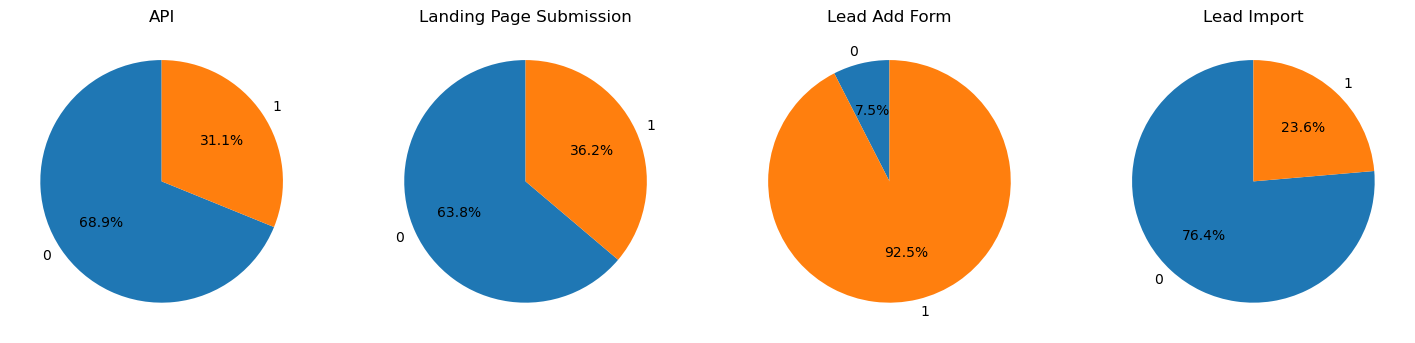

In [66]:
plt.figure(figsize=(18, 4))
for i in enumerate(pvt_origin.columns[:4]):
    ax = plt.subplot(1, 4, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_origin.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

In [67]:
pvt_source = pd.pivot_table(df, index=['Converted'], columns='Lead Source', values='Lead Origin', aggfunc = 'count')
pvt_source

Lead Source,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,,
0,1725,42,1721,1307,718,19,44,94,2
1,818,13,1147,448,436,9,490,31,140


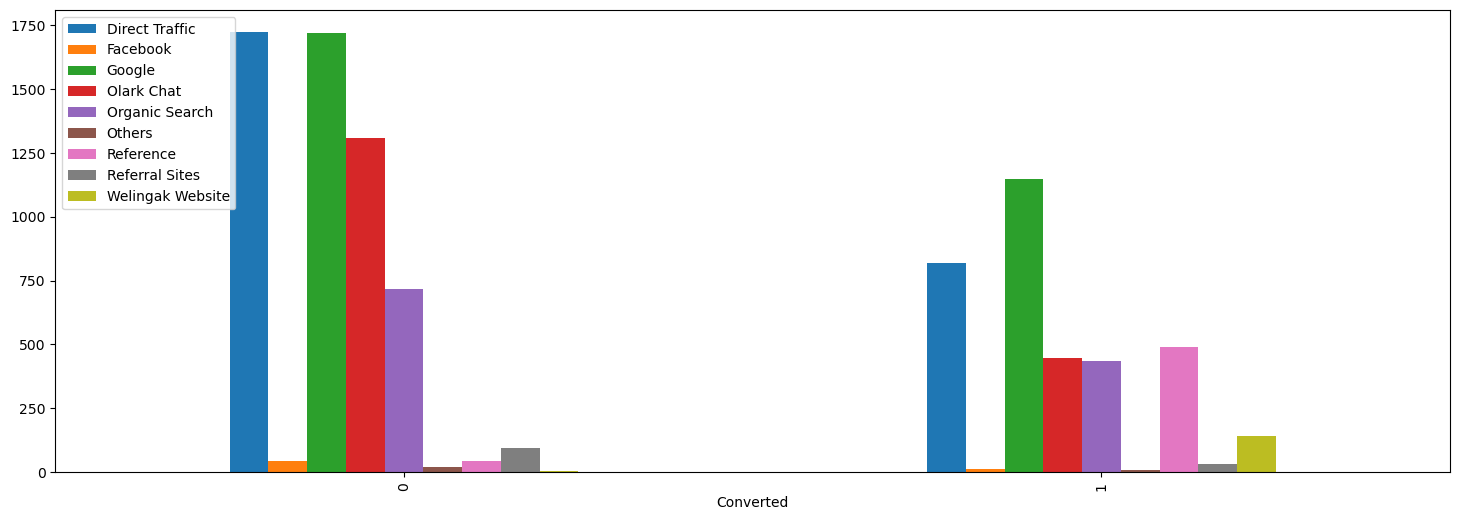

In [68]:
ax = pvt_source.plot.bar(figsize=(18,6))
ax.legend(loc=2)

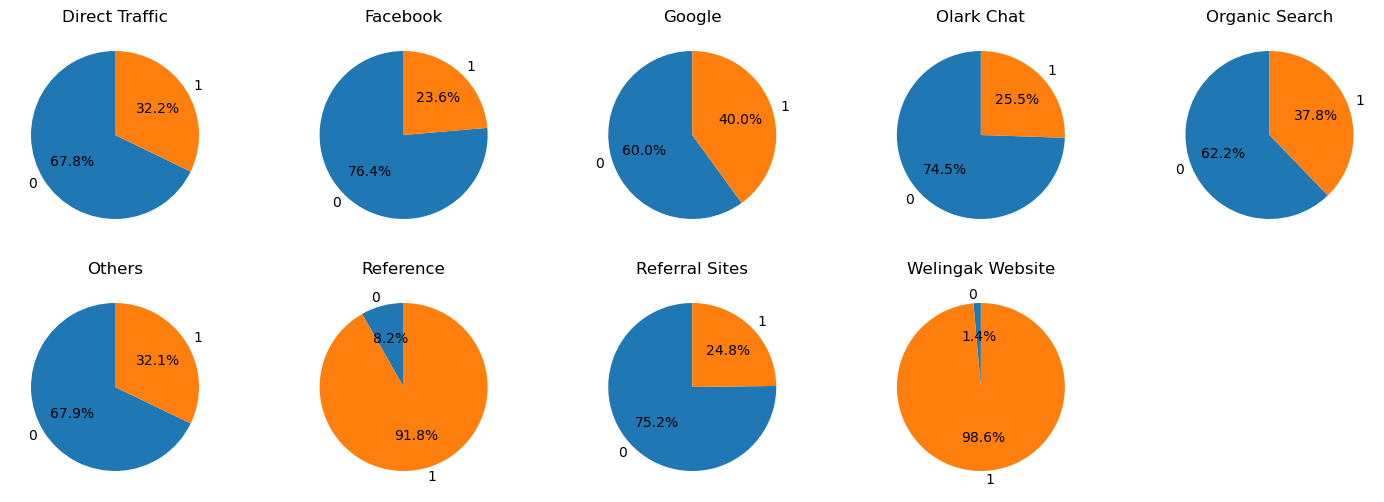

In [69]:
plt.figure(figsize=(18, 6))
for i in enumerate(pvt_source.columns):
    ax = plt.subplot(2, 5, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_source.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

#### Specialization

Speacialization has 15.6% null values. Let's handle the null values before proceeding.

In [70]:
df['Specialization'].value_counts()

Select                               1942
Not Provided                         1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [71]:
df['Specialization'].value_counts() * 100 / nrows

Select                               21.017316
Not Provided                         15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [72]:
# Let's replace 'Select' with 'Not Provided'
col = 'Specialization'
specialization_select_index = df[df[col] == 'Select'].index.to_list()
df.loc[specialization_select_index, col] = 'Not Provided'
df[col].value_counts()

Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [73]:
# Let's group all business management majors into 'Business Management'
biz_management = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', \
                  'Business Administration', 'Supply Chain Management', 'International Business', 'Retail Management', \
                  'Services Excellence', 'E-COMMERCE', 'E-Business', 'Media and Advertising', 'IT Projects Management']
biz_man_index = df[df[col].isin(biz_management)].index.to_list()
df.loc[biz_man_index, col] = 'Business Management'

In [74]:
# Let's merge Travel and Tourism into Hospitality Management
travel_index = df[df[col] == 'Travel and Tourism'].index.to_list()
df.loc[travel_index, col] = 'Hospitality Management'
df[col].value_counts()

Business Management                  4973
Not Provided                         3380
Banking, Investment And Insurance     338
Hospitality Management                317
Healthcare Management                 159
Rural and Agribusiness                 73
Name: Specialization, dtype: int64

In [75]:
pvt_specialization = pd.pivot_table(df, index=['Converted'], columns=col, values='Lead Origin', aggfunc = 'count')
pvt_specialization

Specialization,"Banking, Investment And Insurance",Business Management,Healthcare Management,Hospitality Management,Not Provided,Rural and Agribusiness
Converted,,,,,,
0,171,2778,80,197,2411,42
1,167,2195,79,120,969,31


<Axes: xlabel='Converted'>

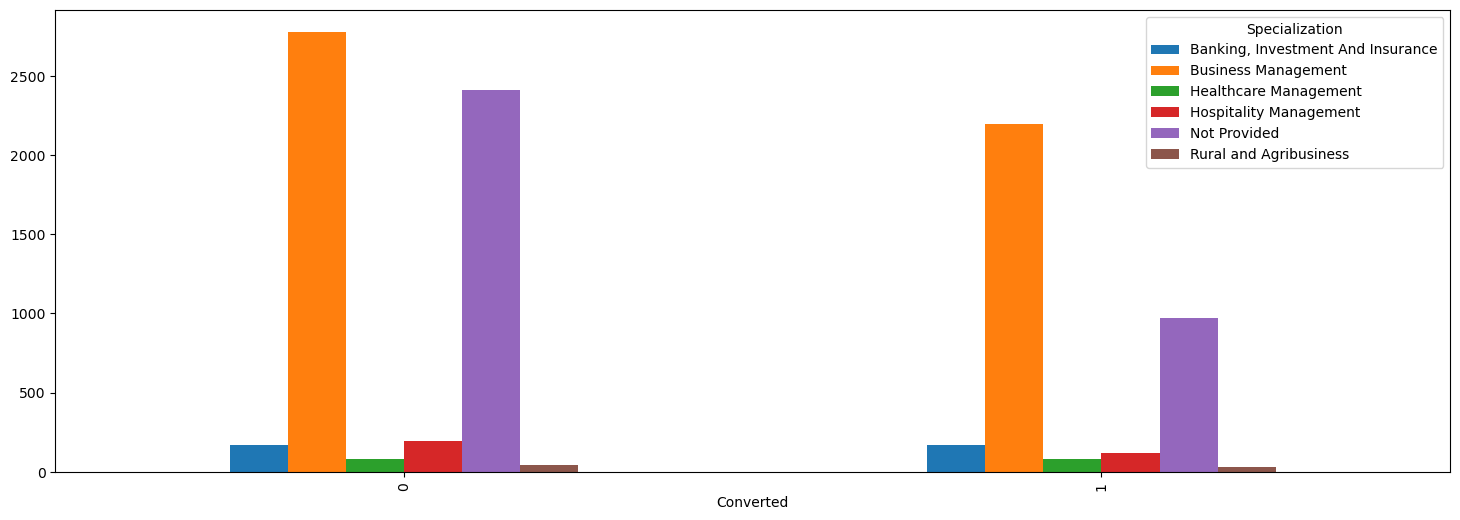

In [76]:
pvt_specialization.plot.bar(figsize = (18, 6))

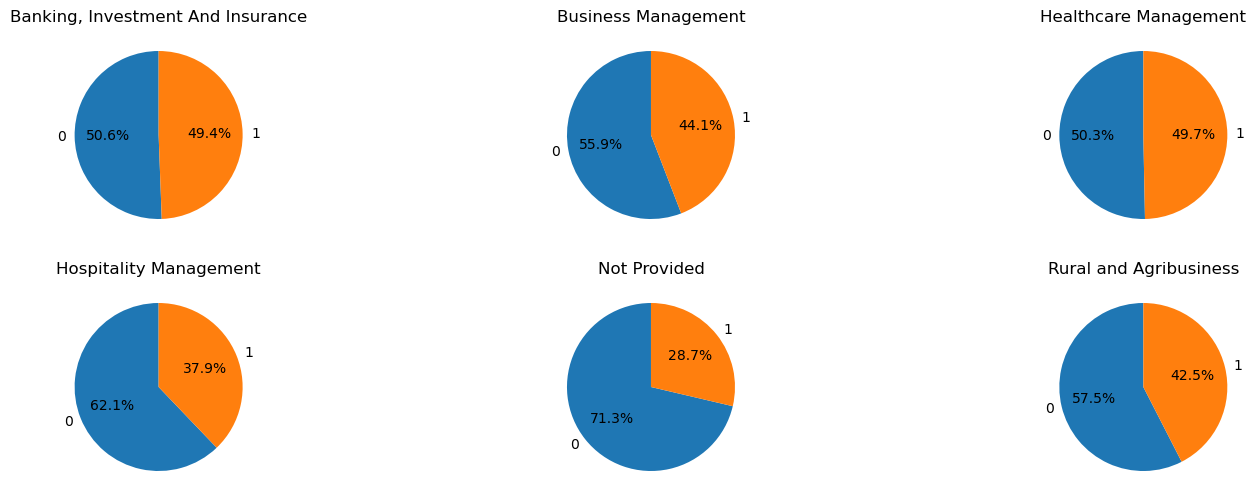

In [77]:
plt.figure(figsize=(18, 6))
for i in enumerate(pvt_specialization.columns):
    ax = plt.subplot(2, 3, i[0]+1)
    ax.title.set_text(i[1])
    plt.pie(pvt_specialization.loc[:,i[1]], labels = [0, 1], autopct='%1.1f%%', startangle=90)

Now, let's see the shape of our data after dropping the columns with high null value percentage and columns with not-useful data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

### SUMMARY

Key findings from the Exploratory Data Analysis (EDA) include:

* The dataset exhibits imbalance, with 61.5% of values indicating non-conversion (0) and only 38.5% indicating conversion (1).
* Columns with high null values (>30%) are dropped early in the process to streamline the model in later stages.
* Columns where over 95% of data points have a particular value are also dropped, as they are not deemed useful for the classification task.
* Following the review of the data, only 15 columns remain, down from the initial 37 columns.

## 3. Preparing data for model building

### Creating dummy variables

In [79]:
cat_vars = df.loc[:, df.dtypes == 'object'].columns
cat_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
df = pd.get_dummies(data=df,columns=cat_vars, drop_first = True)
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Not Provided',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Country_International', 'Country_Not Provided',
    

In [81]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [82]:
# Test Train Split
from sklearn.model_selection import train_test_split

In [83]:
# Put all the feature variables in X
Y = df.pop('Converted')
X = df
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

In [86]:
# Scale the three numeric features present in the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3241,0.235294,0.428257,0.147778,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5315,0.117647,0.123239,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4039,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7079,0.117647,0.128961,0.222222,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5655,0.058824,0.218310,0.111111,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## 4. Model Building

In [87]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter = 4000)

In [88]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(lg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=4000), n_features_to_select=15)

In [89]:
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Country_Not Provided',
       'Specialization_Not Provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not Provided',
       'Last Notable Activity_Others', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [90]:
X_train = X_train[selected_cols]

In [91]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lg1_res = lg1.fit()
lg1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.9
Date:                Tue, 26 Dec 2023   Deviance:                       5263.7
Time:                        23:57:25   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.5674      0.140    -11.167      0.000      -1.843      -1.292
TotalVisits                                                    1.0134      0.214      4.739      0.000       0.594       1.433
Total Time Spent on Website                                    4.5971      0.168     27.283      0.000       4.267       4.927
Lead Origin_Landing Page Submission                           -1.0188      0.124     -8.214      0.000      -1.262      -0.776
Lead Origin_Lead Add Form                                      1.8313      0.212      8.652      0.000       1.416       2.246
Lead Origin_Lead Import                                       -1.2464      0.416     -2.995      0.003      -2.062      -0.431
Lead Source_Welingak Website                                   3.3796      1.029      3.285      0.001       1.363       5.396
Do Not Email_Yes                                              -1.4285      0.167     -8.549      0.000      -1.756      -1.101
Last Activity_SMS Sent                                         1.5307      0.074     20.599      0.000       1.385       1.676
Country_Not Provided                                           1.3958      0.130     10.775      0.000       1.142       1.650
Specialization_Not Provided                                   -1.0897      0.125     -8.730      0.000      -1.334      -0.845
What is your current occupation_Housewife                     22.8566   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
What is your current occupation_Working Professional           2.4673      0.196     12.603      0.000       2.084       2.851
What matters most to you in choosing a course_Not Provided    -1.1661      0.087    -13.460      0.000      -1.336      -0.996
Last Notable Activity_Others                                   2.3198      0.776      2.988      0.003       0.798       3.841
Last Notable Activity_Unreachable                              1.8025      0.537      3.356      0.001       0.750       2.855
==============================================================================================================================
"""

In [92]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
8,Country_Not Provided,2.78
9,Specialization_Not Provided,2.67
0,TotalVisits,2.62
1,Total Time Spent on Website,2.11
3,Lead Origin_Lead Add Form,1.98
12,What matters most to you in choosing a course_...,1.59
7,Last Activity_SMS Sent,1.48
5,Lead Source_Welingak Website,1.34
11,What is your current occupation_Working Profes...,1.21


The observation suggests that the majority of variables have a p-value less than 5%, indicating statistical significance. However, an exception is the 'What is your current occupation_Housewife' variable. Additionally, no variable exhibits a Variance Inflation Factor (VIF) exceeding 5. The plan for the next iterations involves dropping the 'What is your current occupation_Housewife' column.

In [94]:
col = 'What is your current occupation_Housewife'
X_train.drop(col, axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)

In [95]:
# Refit the model with the new set of features
lg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lg2_res = lg2.fit()
lg2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.5
Date:                Tue, 26 Dec 2023   Deviance:                       5273.0
Time:                        23:57:26   Pearson chi2:                 7.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.5517      0.140    -11.082      0.000      -1.826      -1.277
TotalVisits                                                    1.0006      0.214      4.684      0.000       0.582       1.419
Total Time Spent on Website                                    4.5878      0.168     27.269      0.000       4.258       4.918
Lead Origin_Landing Page Submission                           -1.0218      0.124     -8.251      0.000      -1.264      -0.779
Lead Origin_Lead Add Form                                      1.8581      0.211      8.795      0.000       1.444       2.272
Lead Origin_Lead Import                                       -1.2443      0.416     -2.991      0.003      -2.060      -0.429
Lead Source_Welingak Website                                   3.3554      1.029      3.262      0.001       1.339       5.371
Do Not Email_Yes                                              -1.4317      0.167     -8.568      0.000      -1.759      -1.104
Last Activity_SMS Sent                                         1.5252      0.074     20.543      0.000       1.380       1.671
Country_Not Provided                                           1.3861      0.129     10.725      0.000       1.133       1.639
Specialization_Not Provided                                   -1.0962      0.125     -8.789      0.000      -1.341      -0.852
What is your current occupation_Working Professional           2.4612      0.196     12.574      0.000       2.078       2.845
What matters most to you in choosing a course_Not Provided    -1.1675      0.087    -13.484      0.000      -1.337      -0.998
Last Notable Activity_Others                                   2.3138      0.776      2.982      0.003       0.793       3.834
Last Notable Activity_Unreachable                              1.7968      0.537      3.344      0.001       0.744       2.850
==============================================================================================================================
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
8,Country_Not Provided,2.78
9,Specialization_Not Provided,2.67
0,TotalVisits,2.62
1,Total Time Spent on Website,2.11
3,Lead Origin_Lead Add Form,1.97
11,What matters most to you in choosing a course_...,1.59
7,Last Activity_SMS Sent,1.47
5,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.21


The observation indicates that all variables now exhibit low p-values, and none of the variables have a VIF greater than 5. The suggestion is to employ this model to make predictions on the training set

## 5. Model evaluation

In [97]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = lg2_res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.75986908, 0.40972388, 0.08096351, 0.13423063, 0.1804934 ,
       0.07245918, 0.28820362, 0.50756491, 0.11725666, 0.93323975])

In [98]:
# Let's construct a dataframe to facilitate the evaluation of predictions.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.759869
1,1,0.409724
2,0,0.080964
3,0,0.134231
4,1,0.180493


In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.759869,1
1,1,0.409724,0
2,0,0.080964,0
3,0,0.134231,0
4,1,0.180493,0


In [100]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [101]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3507  446]
 [ 740 1775]]


In [102]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8166357452071737


In [103]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positives 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
sensitivity = TP/(TP+FN)
sensitivity

0.705765407554672

In [105]:
specificity = TN/(TN+FP)
specificity

0.8871742980015178

In [106]:
# define a function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

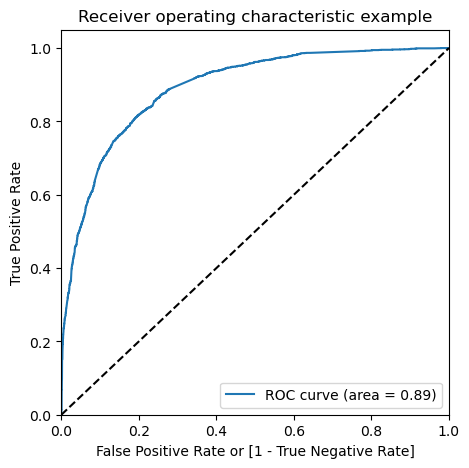

In [108]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [109]:
numbers = [float(x)/10 for x in np.arange(0, 10, 0.5)]

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in np.arange(0, 10, 0.5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,1,0.759869,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,1,0.409724,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.080964,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.134231,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.180493,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Now, let's create a dataframe to see the performance metrics at different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      Prob  Accuracy  Sensitivity  Specificity
0.00  0.00  0.388837     1.000000     0.000000
0.05  0.05  0.491033     0.995229     0.170250
0.10  0.10  0.634354     0.976143     0.416899
0.15  0.15  0.711967     0.947117     0.562358
0.20  0.20  0.748299     0.924453     0.636226
0.25  0.25  0.791744     0.875149     0.738679
0.30  0.30  0.798237     0.838171     0.772831
0.35  0.35  0.808442     0.815109     0.804199
0.40  0.40  0.812616     0.780517     0.833038
0.45  0.45  0.817409     0.748310     0.861371
0.50  0.50  0.816636     0.705765     0.887174
0.55  0.55  0.814626     0.677932     0.901594
0.60  0.60  0.799474     0.604771     0.923349
0.65  0.65  0.793445     0.567793     0.937010
0.70  0.70  0.783395     0.530020     0.944599
0.75  0.75  0.776592     0.492247     0.957501
0.80  0.80  0.761441     0.438171     0.967114
0.85  0.85  0.738095     0.363022     0.976727
0.90  0.90  0.712894     0.279523     0.988616
0.95  0.95  0.689858     0.209145     0.995699


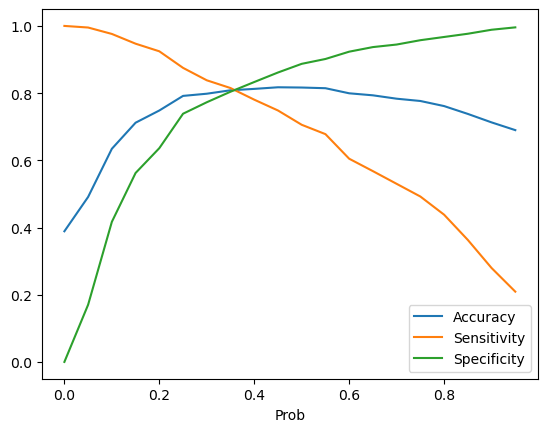

In [112]:
# And now let's plot these lines
cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

We can see that the 3 performance metrics intersect at the probability level of 0.38. Let's make predictions based on this cut-off probability

In [113]:
cut_off = 0.38
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > cut_off else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,1,0.759869,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
1,1,0.409724,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0.080964,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.134231,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.180493,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Let's re-check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8106060606060606

In [115]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3244,  709],
       [ 516, 1999]])

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
sensitivity = TP/(TP+FN)
sensitivity

0.794831013916501

In [118]:
specificity = TN/(TN+FP)
specificity

0.8206425499620541

We can see that:
* Accuracy score falls from 0.8166 to 0.8106
* Sensitivity rises from 0.7058 to 0.7948
* Specificity falls from 0.8872to 0.8206

Now, let's make prediction on the test set

## 6. Making prediction on the test set

In [119]:
# Scale the test set as well using just 'transform'
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [120]:
selected_cols = X_train.columns
X_test = X_test[selected_cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Country_Not Provided,Specialization_Not Provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not Provided,Last Notable Activity_Others,Last Notable Activity_Unreachable
2018,0.058824,0.580986,1,0,0,0,0,0,1,0,1,0,0,0
8181,0.000000,0.000000,0,1,0,0,0,1,1,1,0,0,0,0
2032,0.529412,0.056338,1,0,0,0,0,0,0,0,0,0,0,0
529,0.117647,0.445423,1,0,0,0,0,0,0,0,0,1,0,0
3641,0.294118,0.531250,1,0,0,0,0,1,0,0,0,0,0,0


In [121]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [122]:
y_test_pred = lg2_res.predict(X_test_sm)

In [123]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
2018,0.981982
8181,0.892974
2032,0.143660
529,0.170831
3641,0.843345


In [124]:
# Convert y_test to dataframe for easy concatenation
y_test_df = pd.DataFrame(y_test)

In [125]:
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.981982
1,0,0.892974
2,1,0.143660
3,1,0.170831
4,1,0.843345


In [127]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [128]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [129]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8095238095238095

In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1412,  314],
       [ 214,  832]])

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
sensitivity = TP/(TP+FN)
sensitivity

0.7954110898661568

In [133]:
specificity = TN/(TN+FP)
specificity

0.8180764774044033

In [134]:
precision = TP / (TP + FP)
precision

0.7260034904013961

In [135]:
recall = TP / (TP + FN)
recall

0.7954110898661568

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

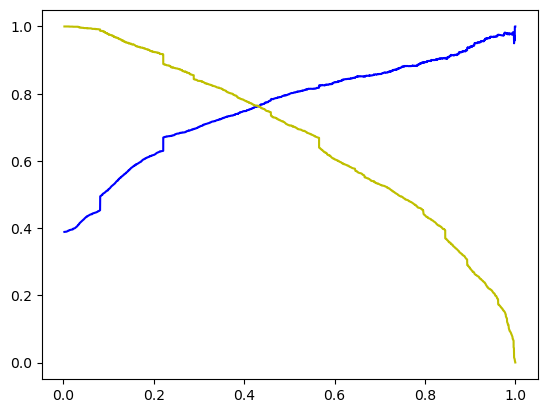

In [138]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()